In [5]:
#Importing packages  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#Question 2 Loading Data 
df = pd.read_csv('/sfs/weka/scratch/khs2fu/DS 3001/mammogram.csv')
df.head()

,treatment,breast_cancer_death
0,mammogram,yes
1,mammogram,yes
2,mammogram,yes
3,mammogram,yes
4,mammogram,yes


In [7]:
#Part 1 
print( pd.crosstab( df['treatment'], df['breast_cancer_death']) , '\n')
print( pd.crosstab( df['treatment'], df['breast_cancer_death'], margins=True, normalize=True) , '\n')

breast_cancer_death     no  yes
treatment                      
control              44405  505
mammogram            44425  500 

breast_cancer_death        no       yes       All
treatment                                        
control              0.494295  0.005621  0.499917
mammogram            0.494518  0.005566  0.500083
All                  0.988813  0.011187  1.000000 



In [8]:
#Part 1 
control_survival_rate = (44405/(44405+505))
mammogram_survival_rate = (44425/(44425+500))
raw_effect = mammogram_survival_rate - control_survival_rate
print(raw_effect)

0.00011505110015985753


In [ ]:
#The difference in survival rates between the two groups is very slight 

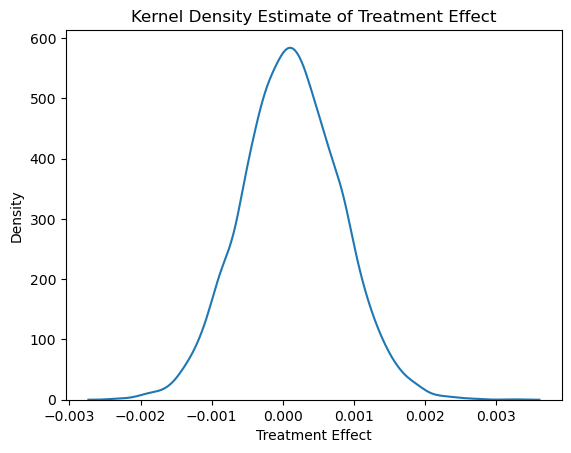

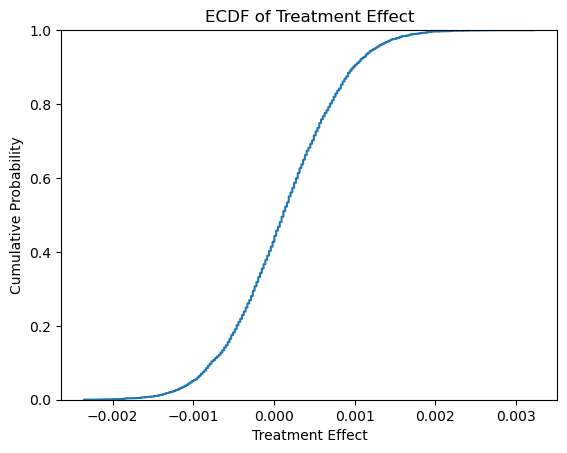

In [9]:
#Part 2 Boostrapping Densities and distributions 
df['survive'] = 0
df.loc[ df['breast_cancer_death'] == 'no', 'survive'] = 1

df_treat = df.loc[ df['treatment'] == 'mammogram', :]
df_control = df.loc[ df['treatment'] == 'control', :]

S = 5000
fx = []
for t in range(S):
    df_treat_t = df_treat.sample( df_treat.shape[0], axis=0, replace=True)
    df_control_t = df_control.sample( df_control.shape[0], axis=0, replace=True)
    treatment_effect_t = np.mean(df_treat_t['survive']) - np.mean(df_control_t['survive'])
    fx.append(treatment_effect_t)

#Desnisty Plot 
sns.kdeplot(fx)
plt.title('Kernel Density Estimate of Treatment Effect')
plt.xlabel('Treatment Effect')
plt.ylabel('Density')
plt.show()

#Distribution Plot 
sns.ecdfplot(fx)
plt.title('ECDF of Treatment Effect')
plt.xlabel('Treatment Effect')
plt.ylabel('Cumulative Probability')
plt.show()

In [10]:
#Part 3 Confidence Interval 
level = .99
lower_bound = np.quantile(fx, .005 )
upper_bound = np.quantile(fx, .995)

print('99% confidence interval: (', lower_bound, ', ', upper_bound, ')' )

99% confidence interval: ( -0.0016659188902754334 ,  0.0019405091392207352 )


In [ ]:
#The confidence level does include the value 0 which means the difference is not statistically significant since the possible difference is 0 and even at the outer bounds its hardly anything to make a causal claim for one treatment or the other. 

In [ ]:
#Part 4 Critique the data 
#These data are fairly large however it does not have much variation in outcomes which might have lead to different more significant outcome.
#The data only consider the final outcome, a set of data with more variables to compare the two treatments like amounts spent on treatments, how many times the cancer resurged if at all, what their quality of life was like, etc.
#It is possible though that the two treatment methods are not very dissimilar in their outcome obviously each was endorced enough to be used on actual patients at this scale. 

In [11]:
#Question 3 Loading in the data 
df2 = pd.read_csv('/sfs/weka/scratch/khs2fu/DS 3001/diabetes_hw.csv')
df2.head()

,Unnamed: 0,treatment,outcome
0,1,met,success
1,2,rosi,failure
2,3,rosi,success
3,4,lifestyle,success
4,5,met,success


In [14]:
#Part 1 Cross Tabulating 
df2['success'] = 0
df2.loc[df2['outcome']=='success','success'] = 1
print(pd.crosstab(df2['treatment'], df2['outcome']), '\n')
print(pd.crosstab(df2['treatment'], df2['outcome'], margins=True), '\n')
print(pd.crosstab(df2['treatment'], df2['outcome'], margins=True, normalize=True), '\n')

outcome    failure  success
treatment                  
lifestyle      109      125
met            120      112
rosi            90      143 

outcome    failure  success  All
treatment                       
lifestyle      109      125  234
met            120      112  232
rosi            90      143  233
All            319      380  699 

outcome     failure   success       All
treatment                              
lifestyle  0.155937  0.178827  0.334764
met        0.171674  0.160229  0.331903
rosi       0.128755  0.204578  0.333333
All        0.456366  0.543634  1.000000 



In [16]:
#Part 2 Proportion of Success 
lifestyle_success= (125/234)
met_success= (112/232)
rosi_success= (143/233)
overall_success= (380/699)
print('lifestyle success rate: ', lifestyle_success)
print('met success rate: ', met_success)
print('rosi success rate: ', rosi_success)
print('overall success rate: ', overall_success)

lifestyle success rate:  0.5341880341880342
met success rate:  0.4827586206896552
rosi success rate:  0.6137339055793991
overall success rate:  0.5436337625178826


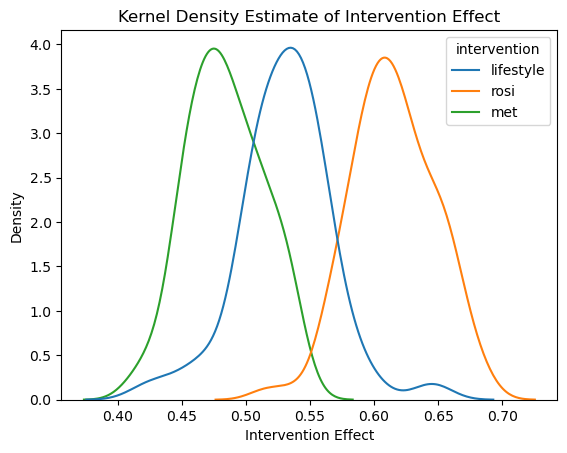

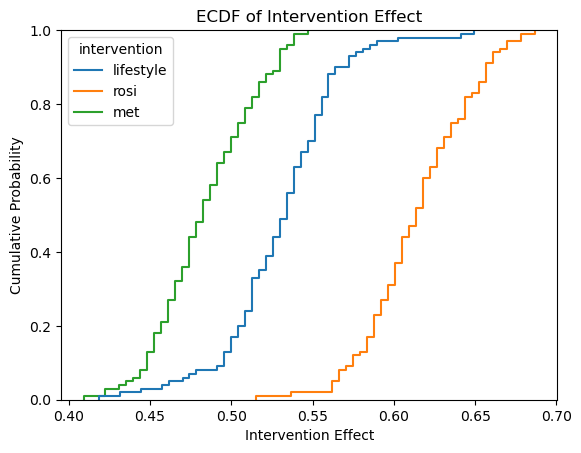

In [26]:
#Part 3 Boostrapping Densities and Distributions
## 3. 
df2_lif = df2.loc[ df2['treatment'] == 'lifestyle', :]
df2_ros = df2.loc[ df2['treatment'] == 'rosi', :]
df2_met = df2.loc[ df2['treatment'] == 'met', :]

S = 100
fx_lif = []
fx_ros = []
fx_met = []
for t in range(S):
    df2_lif_t = df2_lif.sample( df2_lif.shape[0], axis=0, replace=True)
    df2_ros_t = df2_ros.sample( df2_ros.shape[0], axis=0, replace=True)
    df2_met_t = df2_met.sample( df2_met.shape[0], axis=0, replace=True)

    fx_lif_t = np.mean(df2_lif_t['success'])
    fx_ros_t = np.mean(df2_ros_t['success'])
    fx_met_t = np.mean(df2_met_t['success'])

    fx_lif.append(fx_lif_t)
    fx_ros.append(fx_ros_t)
    fx_met.append(fx_met_t)    

gdf_lif = pd.DataFrame({'value':fx_lif, 'intervention':'lifestyle'}) 
gdf_ros = pd.DataFrame({'value':fx_ros, 'intervention':'rosi'})
gdf_met = pd.DataFrame({'value':fx_met, 'intervention':'met'})
gdf = pd.concat([gdf_lif, gdf_ros, gdf_met], axis=0)

sns.kdeplot(gdf, x = 'value', hue = 'intervention')
plt.title('Kernel Density Estimate of Intervention Effect')
plt.xlabel('Intervention Effect')
plt.ylabel('Density')
plt.show()

sns.ecdfplot(gdf, x = 'value', hue = 'intervention')
plt.title('ECDF of Intervention Effect')
plt.xlabel('Intervention Effect')
plt.ylabel('Cumulative Probability')
plt.show()

In [ ]:
#Part 3 
#based on the plots, and the success rates, these data show Rosi is the most effective at ~61%, Lifestlye is second at ~ 53%, then met at 58%

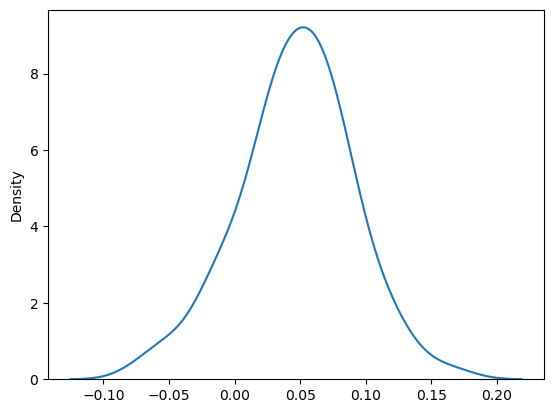

90% Confidence interval, lifestyle min metformin:  -0.022196433834364863 ,  0.11178529325081048


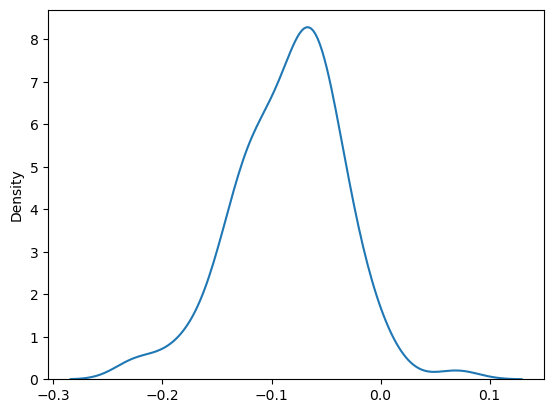

90% Confidence interval, lifestyle min rosi:  -0.16543046843476028 ,  -0.014955430835259093


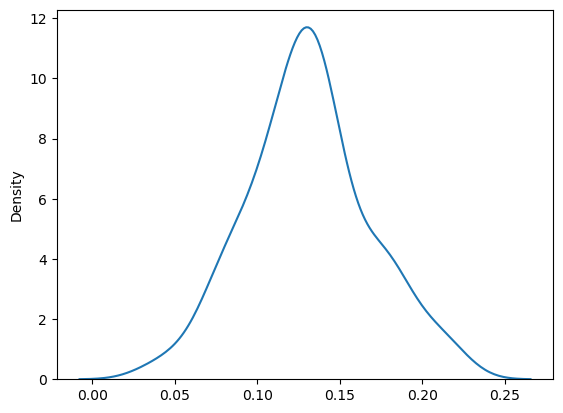

90% Confidence interval, rosi min metformin:  0.0749426520645257 ,  0.19570630457303537


In [31]:
#Part 4 
life_vs_met = np.array(fx_lif)-np.array(fx_met)
sns.kdeplot(x=life_vs_met)
plt.show()
print('90% Confidence interval, lifestyle min metformin: ', np.quantile(life_vs_met,.05), ', ', np.quantile(life_vs_met,.95))

life_vs_rosi = np.array(fx_lif)-np.array(fx_ros)
sns.kdeplot(x=life_vs_rosi)
plt.show()
print('90% Confidence interval, lifestyle min rosi: ', np.quantile(life_vs_rosi,.05), ', ', np.quantile(life_vs_rosi,.95))

rosi_vs_met = np.array(fx_ros)-np.array(fx_met)
sns.kdeplot(x=rosi_vs_met)
plt.show()
print('90% Confidence interval, rosi min metformin: ', np.quantile(rosi_vs_met,.05), ', ', np.quantile(rosi_vs_met,.95))



In [ ]:
#The confidence interval comparing lifestlye and metformin is not statistically significant (includes zero) but appears to indicate lifestyle is slightly better as part 3 showed but not enough to claim that with 90% confidence
#The confidence interval comparing lifestlye to rosi does not include zero and indicates rosi is slightly better 
#The confidence interval comparing rosi to metformin does not include zero and indicates rosi is better

In [ ]:
#Overall the treatments all seem to have similar success rates with slight varation, that being said lifestlye I would say is the least invasive, probably least costly, and safest method when compared to medication, so without more specific knowledge I would say lifestyle is the best treatment given it's similar success rate but safeness, however each specific case likely varies. 